## Financial Dataset: FR - Y 9C

### Import Libraries:

In [1]:
import os ## System Library
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib import rc
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Read and combine the txt files:

In [3]:
# Path to the folder containing the text files
folder_path = r"/Users/harshitaagrawal/Desktop/Capstone Project/Financial Data Download 2004-2024"

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] ## List Comprehension

# Initialize an empty list to store DataFrames
dataframes = []

# Read each file and append the DataFrame to the list
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='^', header=0, engine='python', encoding='latin1', on_bad_lines='skip')
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,RSSD9001,RSSD9999,RSSD9007,RSSD9008,RSSD9132,RSSD9032,RSSD9146,BHBC3368,BHBC3402,BHBC3516,...,BHCKLG24,BHCKLG25,BHCKLG26,BHCKLG27,BHCKLG28,BHCKLL57,BHCKG894,TEXTC490,BHCWKX78,BHCWKX83
0,1020180,20180331,20151231,20230521,551111,9,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020201,20180331,20151231,99991231,551111,7,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020676,20180331,20150906,99991231,551111,7,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020902,20180331,20140805,99991231,551111,10,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1022764,20180331,20170517,99991231,551111,12,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
combined_df.shape

(243757, 3099)

### Subset of Columns:

In [11]:
smalldf = combined_df[['RSSD9001', 'RSSD9007', 'RSSD9017', 'RSSD9032', 'RSSD9146', 'RSSD9999', 'BHCK2170', 'BHCK4107', 'BHCK4073', 'BHCK4079', 'BHCK4093']]
smalldf.head()

,RSSD9001,RSSD9007,RSSD9017,RSSD9032,RSSD9146,RSSD9999,BHCK2170,BHCK4107,BHCK4073,BHCK4079,BHCK4093
0,1020180,20151231,BREMER FINANCIAL CORPORATION,9,1.0,20180331,11959875.0,108983.0,15686.0,30819.0,79566.0
1,1020201,20151231,HSBC USA INC.,7,2.0,20180331,NaN,NaN,NaN,NaN,NaN
2,1020676,20150906,AMALGAMATED INVESTMENTS COMPANY,7,1.0,20180331,778831.0,6679.0,244.0,4839.0,9376.0
3,1020902,20140805,"FIRST NATIONAL OF NEBRASKA, INC.",10,1.0,20180331,19950623.0,322364.0,24664.0,99888.0,224265.0
4,1022764,20170517,CENTRAL PACIFIC FINANCIAL CORP.,12,1.0,20180331,5651287.0,47310.0,4988.0,8692.0,33259.0


In [13]:
name_dict = {'RSSD9001':'RSSD ID',
             'RSSD9007':'Start Date',
             'RSSD9008':'End Date',
             'RSSD9017':'Firm Legal Name',
             'RSSD9032':'FR District Code',
             'RSSD9146':'Bank Count',
             'RSSD9999':'Reporting Date',
             'BHCK2170':'Total Assets', 
             'BHCK4073':'Interest Expense',
             'BHCK4107':'Interest Income Year-to-Date',
             'BHCK4079':'Non-Interest Income Year-to-Date',
             'BHCK4093':'Non-Interest Expense'}
smalldf = smalldf.rename(columns = name_dict).sort_values(by = ['RSSD ID'])
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense
0,1020180,20151231,BREMER FINANCIAL CORPORATION,9,1.0,20180331,11959875.0,108983.0,15686.0,30819.0,79566.0
66758,1020180,20061231,BREMER FINANCIAL CORPORATION,9,9.0,20061231,6751806.0,431501.0,199052.0,80037.0,195618.0
122298,1020180,20051231,BREMER FINANCIAL CORPORATION,9,9.0,20060331,6480680.0,100170.0,43216.0,18200.0,47328.0
238323,1020180,20081231,BREMER FINANCIAL CORPORATION,9,9.0,20091231,7799981.0,383385.0,104692.0,95028.0,233117.0
72467,1020180,20151231,BREMER FINANCIAL CORPORATION,9,1.0,20190630,12745024.0,249584.0,58329.0,52882.0,152837.0


In [15]:
smalldf.shape

(243757, 11)

### Change Date Format:

In [17]:
smalldf['Reporting Date'] = pd.to_datetime(smalldf['Reporting Date'].astype(str), utc=True)
smalldf['Start Date'] = pd.to_datetime(smalldf['Start Date'].astype(str), utc=True)
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0
66758,1020180,2006-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-12-31 00:00:00+00:00,6751806.0,431501.0,199052.0,80037.0,195618.0
122298,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,6480680.0,100170.0,43216.0,18200.0,47328.0
238323,1020180,2008-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2009-12-31 00:00:00+00:00,7799981.0,383385.0,104692.0,95028.0,233117.0
72467,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-06-30 00:00:00+00:00,12745024.0,249584.0,58329.0,52882.0,152837.0


### Define Quarters and Year:

In [19]:
smalldf['Quarter'] = smalldf['Reporting Date'].dt.quarter
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0,1
66758,1020180,2006-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-12-31 00:00:00+00:00,6751806.0,431501.0,199052.0,80037.0,195618.0,4
122298,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,6480680.0,100170.0,43216.0,18200.0,47328.0,1
238323,1020180,2008-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2009-12-31 00:00:00+00:00,7799981.0,383385.0,104692.0,95028.0,233117.0,4
72467,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-06-30 00:00:00+00:00,12745024.0,249584.0,58329.0,52882.0,152837.0,2


In [21]:
smalldf['Year'] = smalldf['Reporting Date'].dt.year
smalldf.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0,1,2018
66758,1020180,2006-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-12-31 00:00:00+00:00,6751806.0,431501.0,199052.0,80037.0,195618.0,4,2006
122298,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,6480680.0,100170.0,43216.0,18200.0,47328.0,1,2006
238323,1020180,2008-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2009-12-31 00:00:00+00:00,7799981.0,383385.0,104692.0,95028.0,233117.0,4,2009
72467,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2019-06-30 00:00:00+00:00,12745024.0,249584.0,58329.0,52882.0,152837.0,2,2019


### Quarterization:

In [23]:
def f(val):
    global last_val
    new_val = val - last_val
    last_val = val
    return new_val

In [25]:
# Quarterization for Interest Income year-to-date

new_dfs = []
for i in smalldf['RSSD ID'].unique():
  new_df_i = smalldf.loc[smalldf['RSSD ID']==i,:]
  for j in smalldf['Year'].unique():
    new_df_i_j = new_df_i.loc[smalldf['Year']==j,:]
    new_df_i_j = new_df_i_j.sort_values('Quarter')
    last_val = 0
    new_df_i_j['Interest Income per Quarter'] = new_df_i_j['Interest Income Year-to-Date'].apply(f)
    new_dfs.append(new_df_i_j)

Quarterized_dfs = pd.concat(new_dfs, ignore_index=True)
Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year,Interest Income per Quarter
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0,1,2018,108983.0
1,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-06-30 00:00:00+00:00,12077601.0,224623.0,36271.0,60958.0,159789.0,2,2018,115640.0
2,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-09-30 00:00:00+00:00,12119987.0,342266.0,58552.0,91838.0,239242.0,3,2018,117643.0
3,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-12-31 00:00:00+00:00,12192038.0,462684.0,83107.0,124334.0,325762.0,4,2018,120418.0
4,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,6480680.0,100170.0,43216.0,18200.0,47328.0,1,2006,100170.0


### Normalization:

In [27]:
Quarterized_dfs['Normalized Interest Income per Quarter'] = Quarterized_dfs['Interest Income per Quarter']/Quarterized_dfs['Total Assets']
Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year,Interest Income per Quarter,Normalized Interest Income per Quarter
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0,1,2018,108983.0,0.009112
1,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-06-30 00:00:00+00:00,12077601.0,224623.0,36271.0,60958.0,159789.0,2,2018,115640.0,0.009575
2,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-09-30 00:00:00+00:00,12119987.0,342266.0,58552.0,91838.0,239242.0,3,2018,117643.0,0.009707
3,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-12-31 00:00:00+00:00,12192038.0,462684.0,83107.0,124334.0,325762.0,4,2018,120418.0,0.009877
4,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,6480680.0,100170.0,43216.0,18200.0,47328.0,1,2006,100170.0,0.015457


## US Department of Treasury Dataset - Yield Curve Rates from 2004-24:

In [29]:
rates_df = pd.read_csv("~/Desktop/Capstone Project/yield-curve-rates-2004-2024.csv")
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,07/15/2024,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,07/12/2024,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,07/11/2024,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,07/10/2024,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,07/09/2024,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [212]:
rates_df.shape

(5139, 14)

In [31]:
# Changing Date to Date-time Format
rates_df['Date'] = pd.to_datetime(rates_df['Date'].astype(str), format='mixed', utc=True)
rates_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2024-07-15 00:00:00+00:00,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46
1,2024-07-12 00:00:00+00:00,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39
2,2024-07-11 00:00:00+00:00,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41
3,2024-07-10 00:00:00+00:00,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47
4,2024-07-09 00:00:00+00:00,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49


In [33]:
# Giving the Year and Quarter each entry
rates_df['Year'] = rates_df['Date'].dt.year
rates_df['Quarter'] = rates_df['Date'].dt.quarter
rates_df.sort_values('Date').head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
5138,2004-01-02 00:00:00+00:00,0.88,NaN,0.93,NaN,1.02,1.31,1.94,2.47,3.36,3.90,4.38,5.21,NaN,2004,1
5137,2004-01-05 00:00:00+00:00,0.88,NaN,0.91,NaN,1.05,1.35,1.95,2.51,3.39,3.92,4.41,5.23,NaN,2004,1
5136,2004-01-06 00:00:00+00:00,0.88,NaN,0.91,NaN,1.03,1.30,1.84,2.38,3.26,3.80,4.29,5.13,NaN,2004,1
5135,2004-01-07 00:00:00+00:00,0.88,NaN,0.91,NaN,1.02,1.29,1.84,2.36,3.25,3.76,4.27,5.11,NaN,2004,1
5134,2004-01-08 00:00:00+00:00,0.87,NaN,0.88,NaN,1.01,1.29,1.85,2.37,3.24,3.76,4.27,5.12,NaN,2004,1


In [35]:
finalrates = rates_df.groupby(['Year', 'Quarter']).mean()
finalrates.head(8)

Date      1 Mo  2 Mo      3 Mo  \
Year Quarter                                                                 
2004 1       2004-02-16 08:30:58.064516096+00:00  0.909677   NaN  0.933710   
     2       2004-05-16 03:29:01.935483904+00:00  0.954516   NaN  1.096129   
     3                 2004-08-16 05:15:00+00:00  1.370000   NaN  1.513906   
     4       2004-11-16 05:01:56.129032320+00:00  1.841774   NaN  2.047419   
2005 1       2005-02-15 01:58:01.967213056+00:00  2.360984   NaN  2.589180   
     2                 2005-05-16 09:22:30+00:00  2.709687   NaN  2.926719   
     3                 2005-08-16 15:45:00+00:00  3.228594   NaN  3.438281   
     4       2005-11-15 21:38:21.639344256+00:00  3.702131   NaN  3.913607   

              4 Mo      6 Mo      1 Yr      2 Yr      3 Yr      5 Yr  \
Year Quarter                                                           
2004 1         NaN  1.003548  1.221452  1.686613  2.163065  2.980968   
     2         NaN  1.359677  1.775484  2.454677  2.971935  3.720968   
     3         NaN  1.788437  2.075000  2.556563  2.919531  3.505625   
     4         NaN  2.297581  2.472742  2.822419  3.058871  3.493710   
2005 1         NaN  2.876885  3.072459  3.454918  3.623934  3.890820   
     2         NaN  3.179688  3.337344  3.645938  3.732344  3.872969   
     3         NaN  3.707031  3.791094  3.957969  3.989219  4.039375   
     4         NaN  4.250492  4.288525  4.364590  4.372295  4.391148   

                  7 Yr     10 Yr     20 Yr  30 Yr  
Year Quarter                                       
2004 1        3.501452  4.010000  4.877903    NaN  
     2        4.183871  4.597097  5.355645    NaN  
     3        3.922188  4.301406  5.068281    NaN  
     4        3.855000  4.175806  4.874839    NaN  
2005 1        4.098852  4.303607  4.764098    NaN  
     2        3.984688  4.158594  4.548750    NaN  
     3        4.108437  4.215156  4.507656    NaN  
     4        4.425738  4.488197  4.767541    NaN

### Daily Treasury Curve:

The importance of different Treasury rates can depend on the context and the financial instruments or decisions involved. However, some Treasury rates are generally considered more significant due to their broader economic implications and their use as benchmarks:

1. **10-Year Treasury Yield:**

-  Significance: Often regarded as a key indicator of investor sentiment and economic health. It's widely used as a benchmark for mortgage rates and other long-term loans.
-  Impact: Movements in the 10-year yield can influence borrowing costs for consumers and businesses, affecting spending and investment decisions.

2. **2-Year Treasury Yield:**

-  Significance: Closely watched as a gauge of Federal Reserve monetary policy expectations. Changes in the 2-year yield can reflect market expectations for future interest rate movements.
-  Impact: It's often used to understand short-term economic outlooks and the stance of monetary policy.

3. **30-Year Treasury Yield:**

-  Significance: Important for long-term investments and planning, such as retirement funds and insurance companies. It reflects long-term economic growth expectations and inflation.
-  Impact: Affects the pricing of long-term loans, mortgages, and other financial products.

4. **5-Year Treasury Yield:**

-  Significance: A middle ground between short-term and long-term rates, providing insights into medium-term economic conditions and expectations.
-  Impact: Influences intermediate-term loans and financing.

5. **3-Month Treasury Bill Rate:**

- Significance: Viewed as a safe haven and a benchmark for short-term interest rates. It's often used in calculating discount rates and as a reference for money market instruments.
- Impact: Reflects liquidity conditions and short-term interest rate expectations.

### Key Points of Interest:

-  **Yield Curve:** The relationship between short-term and long-term Treasury yields, which can signal economic conditions. A normal upward-sloping yield curve indicates healthy economic growth, while an inverted yield curve can signal a potential recession.

- **Inflation Expectations:** Treasury rates can provide insights into market expectations for inflation, with higher rates often indicating higher inflation expectations.

- **Federal Reserve Policy:** The Fed's actions, such as rate hikes or cuts, directly influence short-term Treasury yields and can also affect longer-term yields through expectations and market reactions.

Each Treasury rate serves a different purpose and offers unique insights into various aspects of the economy and financial markets. Understanding the context and the specific financial decision at hand is crucial in determining which Treasury rate is most important.

In [37]:
# Adjusting font
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

### Visualization of all Rates presented in the Dataset over Time:

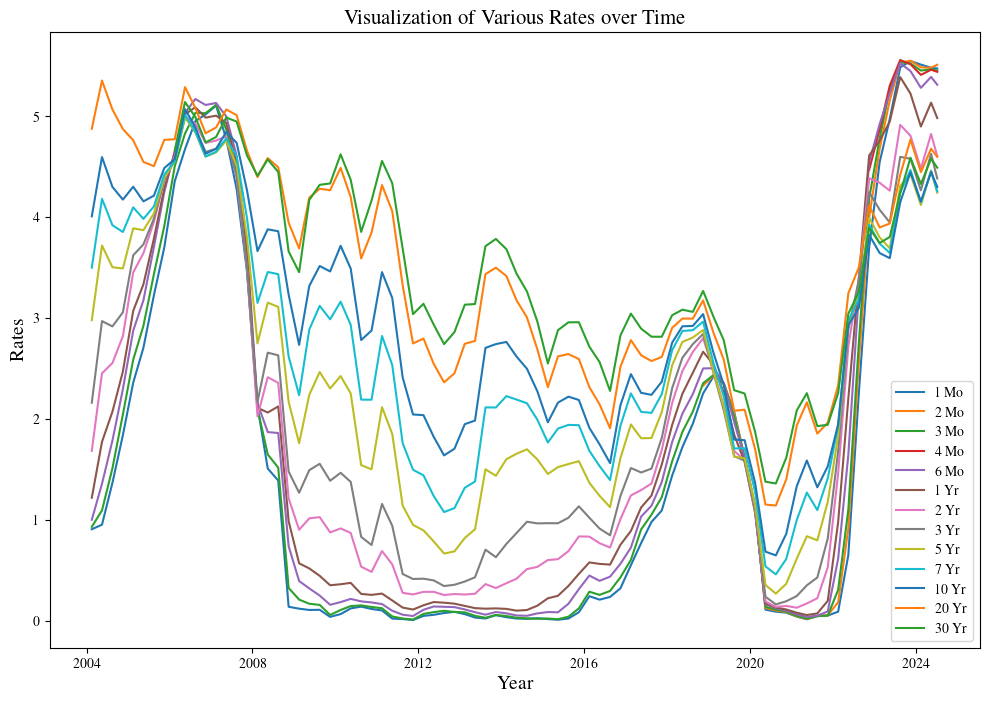

In [40]:
# Adjusting the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Creating the plot
for col in ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']:
    ax.plot(finalrates['Date'], finalrates[col], label=col)

# Adding a plot title and customizing its font size
ax.set_title('Visualization of Various Rates over Time', fontsize=15)

# Adding axis labels and customizing their font size
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Rates', fontsize=14)

# Making a legend for the colors
ax.legend();

**Interpretation:** 

If the graph shows that short-term rates (like 1-month and 2-month rates) have been rising steadily while long-term rates (like 10-year and 30-year rates) remain relatively flat, it might suggest an economic scenario where the central bank is increasing rates to combat inflation, but the long-term outlook remains uncertain.

Conversely, if all rates are rising together, it could indicate overall economic growth and increased expectations of future inflation.

### Visualization of a subset of Rates over Time:

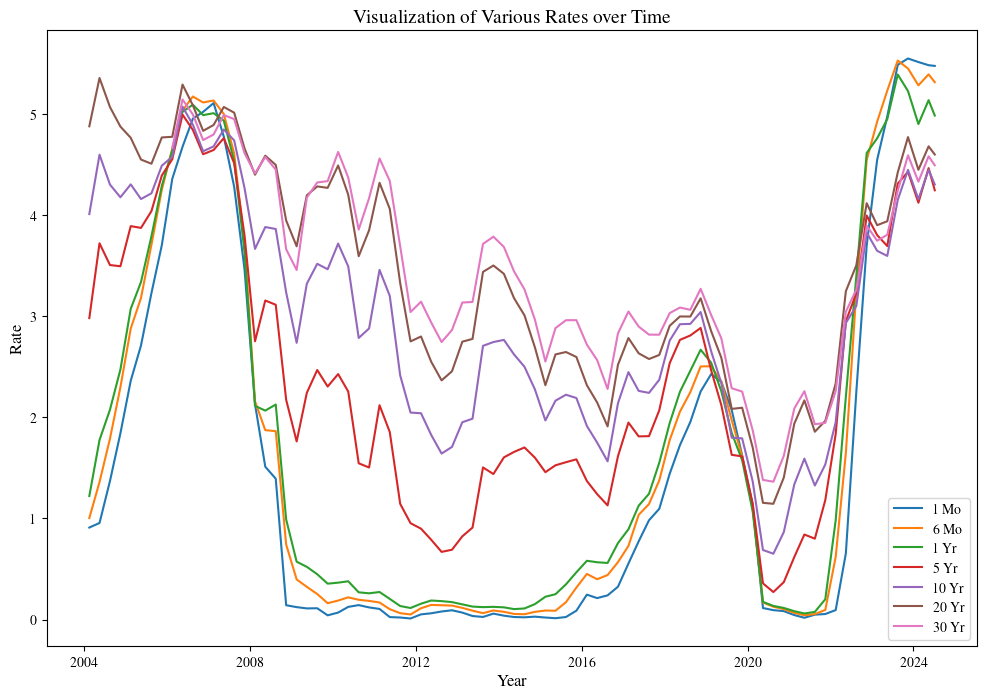

In [43]:
# Making a smaller plot with fewer rates included

# Adjusting the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Creating the plot
for col in ['1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr']:
    ax.plot(finalrates['Date'], finalrates[col], label=col)

# Adding a plot title and customizing its font size
ax.set_title('Visualization of Various Rates over Time', fontsize=14)

# Adding axis labels and customizing their font size
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rate', fontsize=12)

# Making a legend for the colors
ax.legend();

### Highlighting Periods where Short Term Interest Rates are Bigger than Long Term:

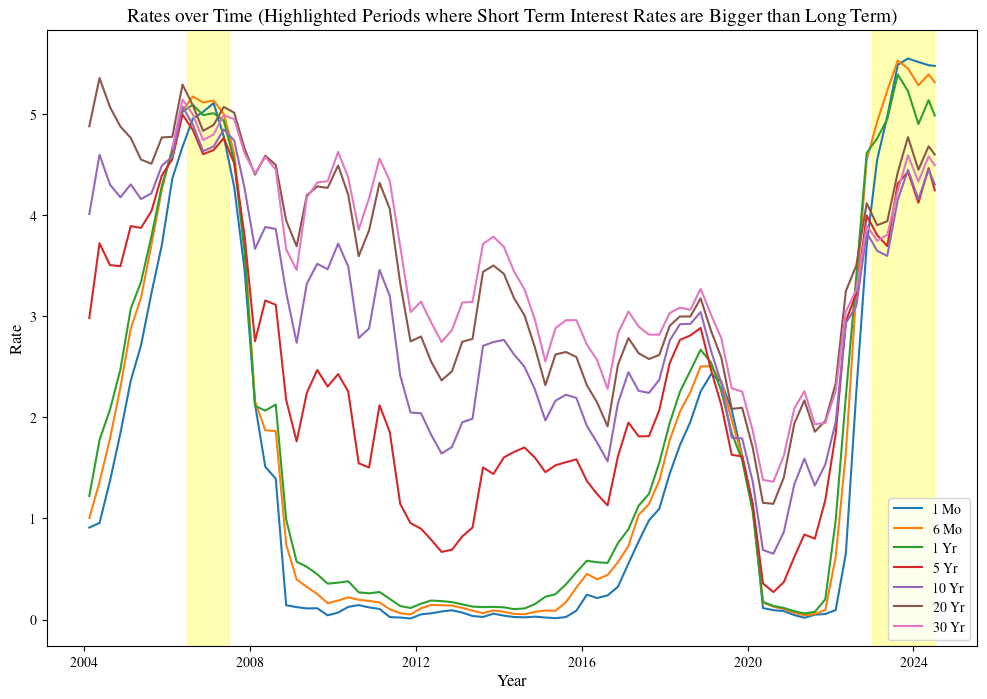

In [46]:
# Adjusting the figure size
fig = plt.subplots(figsize=(12, 8))

# Creating plot
for col in ['1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[col])

# Adding a plot title and customizing its font size
plt.title('Rates over Time (Highlighted Periods where Short Term Interest Rates are Bigger than Long Term)', fontsize=14)

# Adding axis labels and customizing their font size
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate', fontsize=12)

# Make a legend for colors
plt.gca().legend(('1 Mo', '6 Mo', '1 Yr', '5 Yr', '10 Yr', '20 Yr', '30 Yr'), loc='lower right') 

# Highlighting the time period from 2006-6-30 to 2007-06-30 
plt.axvspan(datetime(2006, 6, 30), datetime(2007, 6, 30), color='yellow', alpha=0.3)

# Highlighting the time period from 2022-12-31 to 2024-07-1 
plt.axvspan(datetime(2022, 12, 31), datetime(2024, 7, 1), color='yellow', alpha=0.3);

-  **Highlighting Specific Periods:** The yellow highlighted areas indicate specific time periods where short-term interest rates were greater than long-term interest rates. This can suggest periods of economic stress or unusual market conditions, such as during financial crises or major economic events.
-  **Yield Curve Inversion:** Typically, long-term rates are higher than short-term rates. When this relationship reverses, it can signal an inverted yield curve, which is often seen as a predictor of economic recessions.

In [58]:
finalrates_df = finalrates.copy()
finalrates_df = finalrates_df.drop(columns=["Date"])
finalrates_df.reset_index(inplace=True)
finalrates_df.head()

,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2004,1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN
1,2004,2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN
2,2004,3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN
3,2004,4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN
4,2005,1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN


### Function to modify the format of dates:

In [76]:
def chain_date(date_str):
    for fmt in ('%m/%d/%Y', '%m/%d/%y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

In [78]:
rates_df['Date'] = rates_df['Date'].apply(chain_date)
copy_df = rates_df.copy()
copy_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Year,Quarter
0,2024-07-15 00:00:00+00:00,5.48,5.51,5.43,5.40,5.23,4.85,4.44,4.23,4.13,4.16,4.23,4.56,4.46,2024,3
1,2024-07-12 00:00:00+00:00,5.47,5.52,5.43,5.41,5.23,4.87,4.45,4.22,4.10,4.13,4.18,4.50,4.39,2024,3
2,2024-07-11 00:00:00+00:00,5.48,5.53,5.44,5.41,5.25,4.91,4.50,4.26,4.13,4.15,4.20,4.51,4.41,2024,3
3,2024-07-10 00:00:00+00:00,5.46,5.50,5.46,5.46,5.33,5.01,4.62,4.38,4.24,4.24,4.28,4.58,4.47,2024,3
4,2024-07-09 00:00:00+00:00,5.45,5.51,5.46,5.46,5.34,5.02,4.62,4.37,4.24,4.25,4.30,4.59,4.49,2024,3


### Function to assign quarters:

In [80]:
def assign_quarter(date):
    month = date.month
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

In [82]:
# Asisign the quarters in a new column
copy_df['Quarter'] = copy_df['Date'].apply(assign_quarter)
copy_df['Year'] = copy_df['Date'].dt.year

In [84]:
# Group by quarter and calculate the average of all columns except 'Date'
quarterly_averages = copy_df.groupby(['Year', 'Quarter']).mean(numeric_only=True).reset_index()
quarterly_averages.head(8)

,Year,Quarter,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2004,Q1,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,4.010000,4.877903,NaN
1,2004,Q2,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,4.597097,5.355645,NaN
2,2004,Q3,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,4.301406,5.068281,NaN
3,2004,Q4,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,4.175806,4.874839,NaN
4,2005,Q1,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,4.303607,4.764098,NaN
5,2005,Q2,2.709687,NaN,2.926719,NaN,3.179688,3.337344,3.645938,3.732344,3.872969,3.984688,4.158594,4.548750,NaN
6,2005,Q3,3.228594,NaN,3.438281,NaN,3.707031,3.791094,3.957969,3.989219,4.039375,4.108437,4.215156,4.507656,NaN
7,2005,Q4,3.702131,NaN,3.913607,NaN,4.250492,4.288525,4.364590,4.372295,4.391148,4.425738,4.488197,4.767541,NaN


### Possible Spreads:

In [87]:
columns_to_consider = quarterly_averages.columns[2:]
columns_to_consider

Index(['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [89]:
column_pairs = list(itertools.combinations(columns_to_consider, 2)) ## Gives possible combinations of Spread

In [91]:
# Data frame to store the spreads
spreads_df = pd.DataFrame()

for (col1, col2) in column_pairs:
    spread_col_name = f"{col2}-{col1}_spread"
    spreads_df[spread_col_name] = quarterly_averages[col2] - quarterly_averages[col1]
        
# Add the Year-Quarter columns: Must have 80 columns in total
result_df = pd.concat([quarterly_averages.iloc[:, :2], spreads_df], axis=1)

result_df.head()

,Year,Quarter,2 Mo-1 Mo_spread,3 Mo-1 Mo_spread,4 Mo-1 Mo_spread,6 Mo-1 Mo_spread,1 Yr-1 Mo_spread,2 Yr-1 Mo_spread,3 Yr-1 Mo_spread,5 Yr-1 Mo_spread,...,7 Yr-5 Yr_spread,10 Yr-5 Yr_spread,20 Yr-5 Yr_spread,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread
0,2004,Q1,NaN,0.024032,NaN,0.093871,0.311774,0.776935,1.253387,2.071290,...,0.520484,1.029032,1.896935,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN
1,2004,Q2,NaN,0.141613,NaN,0.405161,0.820968,1.500161,2.017419,2.766452,...,0.462903,0.876129,1.634677,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN
2,2004,Q3,NaN,0.143906,NaN,0.418437,0.705000,1.186562,1.549531,2.135625,...,0.416562,0.795781,1.562656,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN
3,2004,Q4,NaN,0.205645,NaN,0.455806,0.630968,0.980645,1.217097,1.651935,...,0.361290,0.682097,1.381129,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN
4,2005,Q1,NaN,0.228197,NaN,0.515902,0.711475,1.093934,1.262951,1.529836,...,0.208033,0.412787,0.873279,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN


### Visualization of 10Y-3M spread:

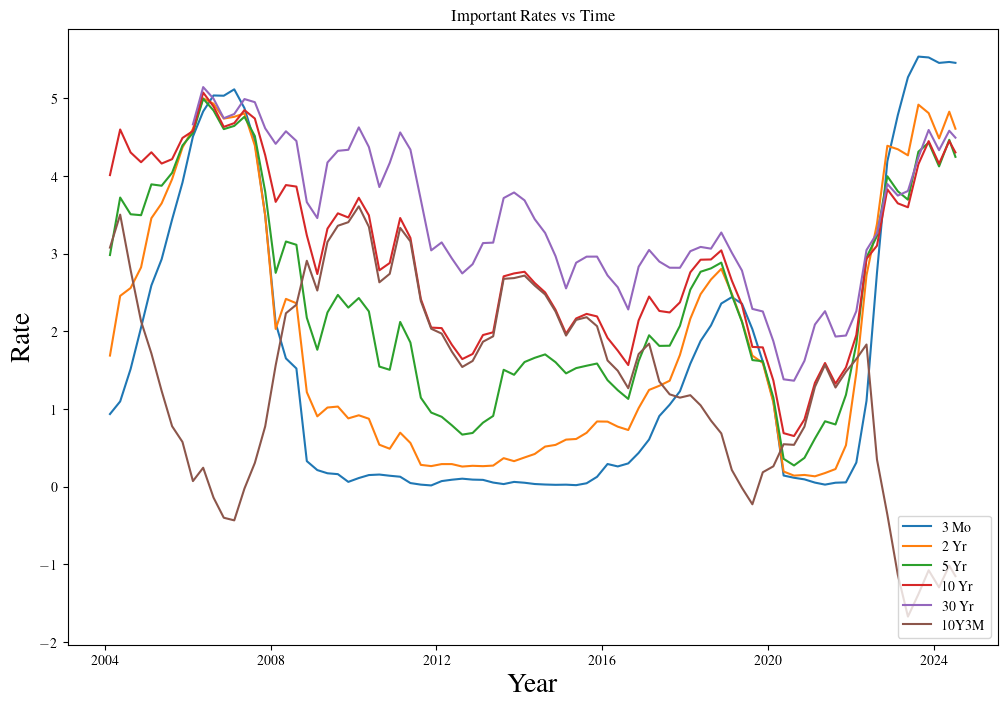

In [93]:
# Need a large figure
fic = plt.subplots(figsize=(12, 8))

# Plot fewer but more important rates
for rate in ['3 Mo', '2 Yr', '5 Yr', '10 Yr', '30 Yr']:
    plt.plot(finalrates['Date'], finalrates[rate])

# Plot 10-year minus 3-month rate
plt.plot(finalrates['Date'], finalrates['10 Yr'] - finalrates['3 Mo'])

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rate', fontsize = 20)
plt.title('Important Rates vs Time')

# Color the curves
plt.gca().legend(('3 Mo', '2 Yr', '5 Yr', '10 Yr', '30 Yr', '10Y3M'), loc = 'lower right');

**Interpretation:** If the 10Y3M line dips below zero (goes negative), this indicates that the 3-month rate is higher than the 10-year rate, suggesting an inverted yield curve. This scenario is typically watched closely by economists and financial analysts as a potential sign of upcoming economic downturns. The other lines show how short-term and long-term interest rates have varied, providing insight into monetary policy impacts and market expectations.

### Plot focusing on periods where the 10-year Treasury yield is less than the 3-month Treasury yield:

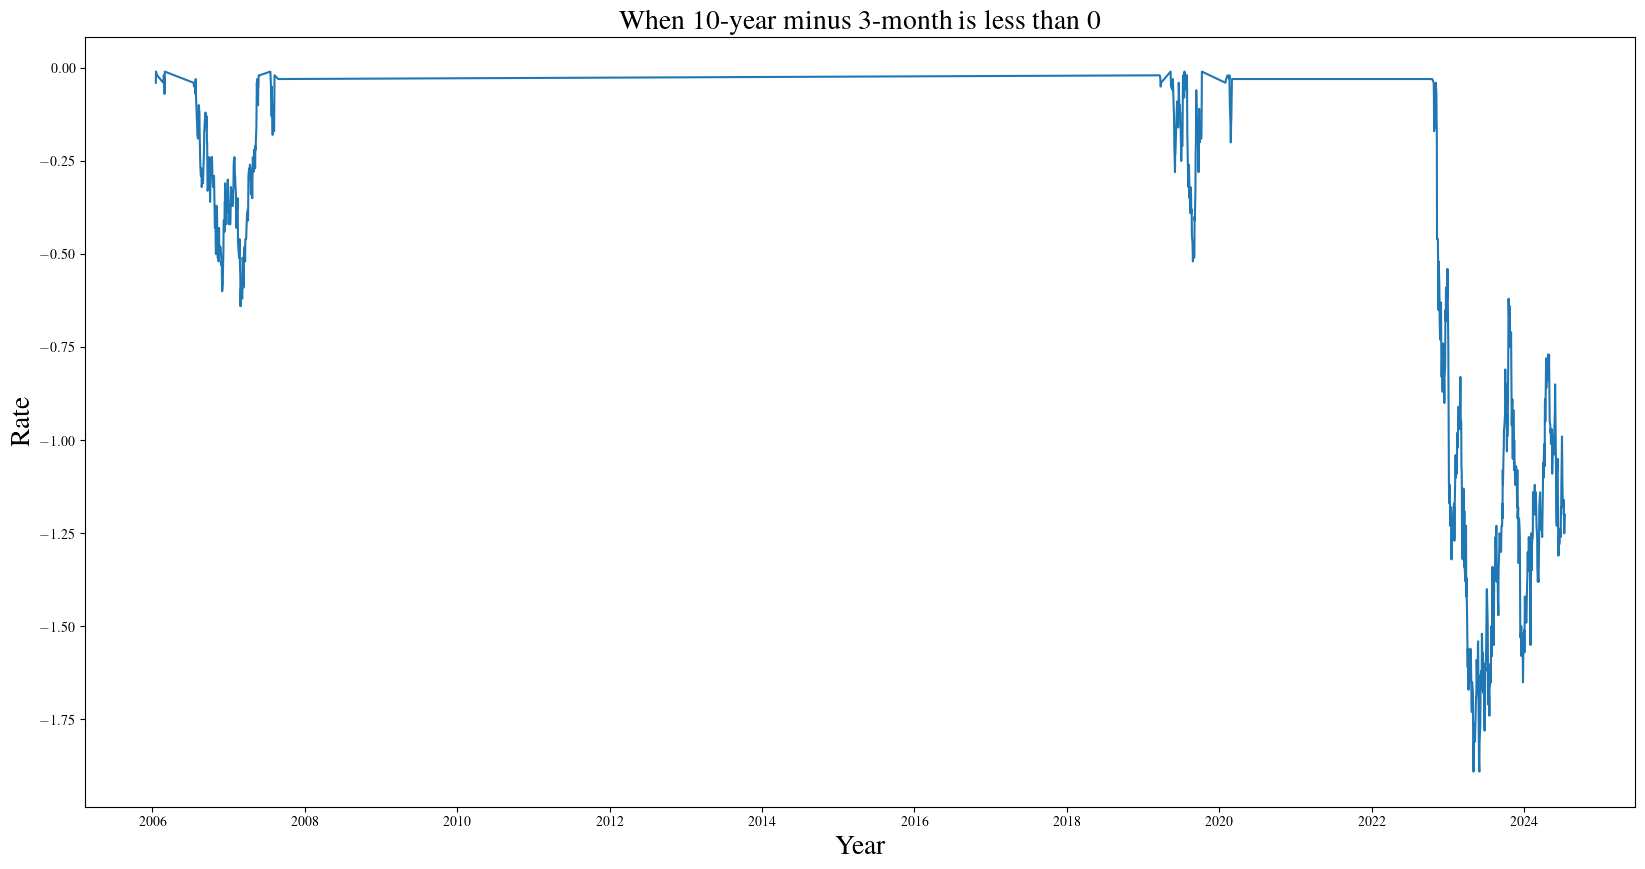

In [95]:
# Plot 10-year minus 3-month when 3-month > 10-year
filtered_rates = rates_df[rates_df['10 Yr'] < rates_df['3 Mo']]

# Need a large figure
fic = plt.subplots(figsize = (20,10))

plt.plot(filtered_rates['Date'], filtered_rates['10 Yr'] - filtered_rates['3 Mo'])
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rate', fontsize = 20)
plt.title('When 10-year minus 3-month is less than 0', fontsize = 20);

**Interpretation:** The plot generated will display the periods when the 10-year Treasury yield is lower than the 3-month Treasury yield, indicating instances where the yield curve may be inverted.

#### Observations on Treasury Rates:

-  Trend of All Treasury Rates are similar.

-  Trends clearly show the periods of 2008 financial crisis, covid pandemic, and post-pandemic era.

-  Longer-term treasury rate are usually more than shorter-term treasury rate. For example, 10-Year rate is usually greater than 3-month rate, except a period before 2008, and the post-pandemic era.

### Correlation Matrix:

In [97]:
def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    ## figsize=(graphWidth, graphWidth): Sets the figure size based on the graphWidth parameter, making the plot square-shaped.
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k') 
    ## plt.matshow() displays the correlation matrix as a heatmap.
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize = 15)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 15)
    ## plt.gca() gets the current Axes instance.
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

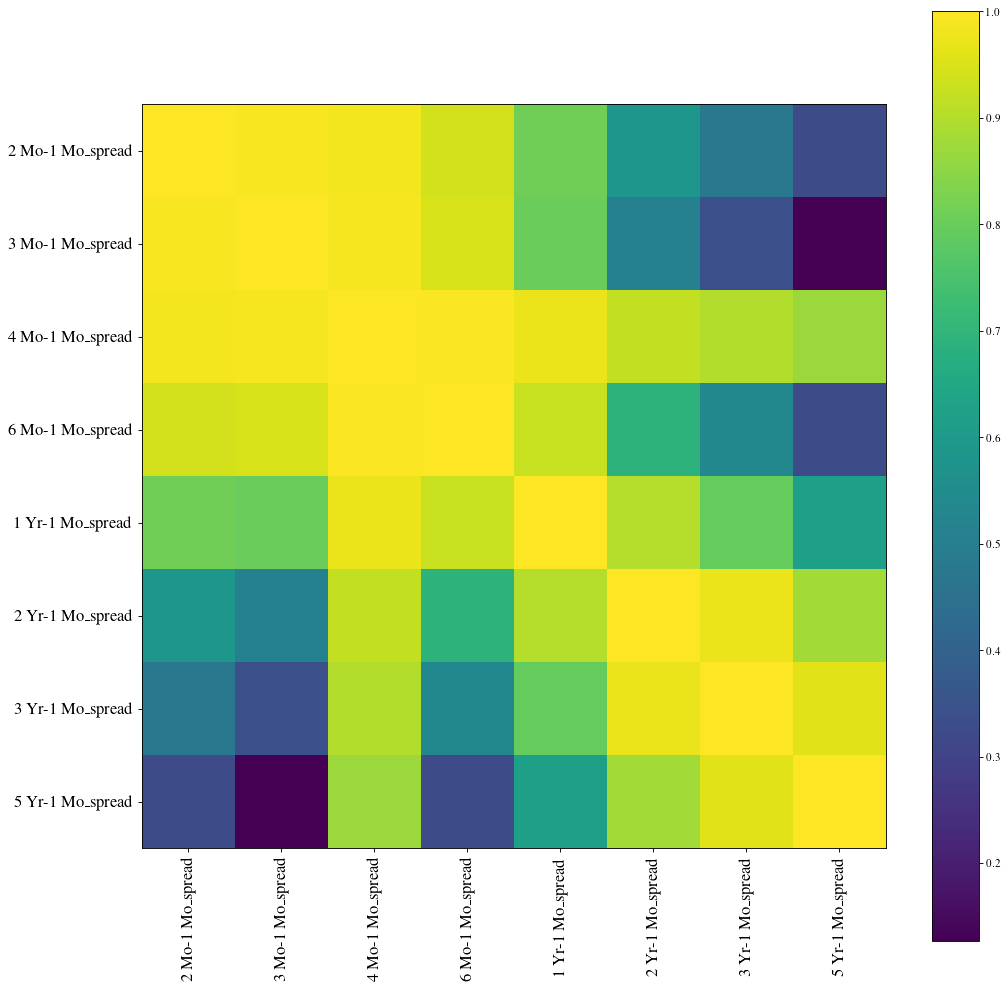

In [99]:
columns_to_consider = result_df.columns[2:10]
columns_to_include = [col for col in columns_to_consider]
df_selected = result_df[columns_to_include]
plotCorrelationMatrix(df_selected, 15)

### Scatter and Density Plots

In [104]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    # keep only numerical columns
    df = df.select_dtypes(include =[np.number]) 
    columnNames = list(df)
    df = df[columnNames]
    #Create the frames
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

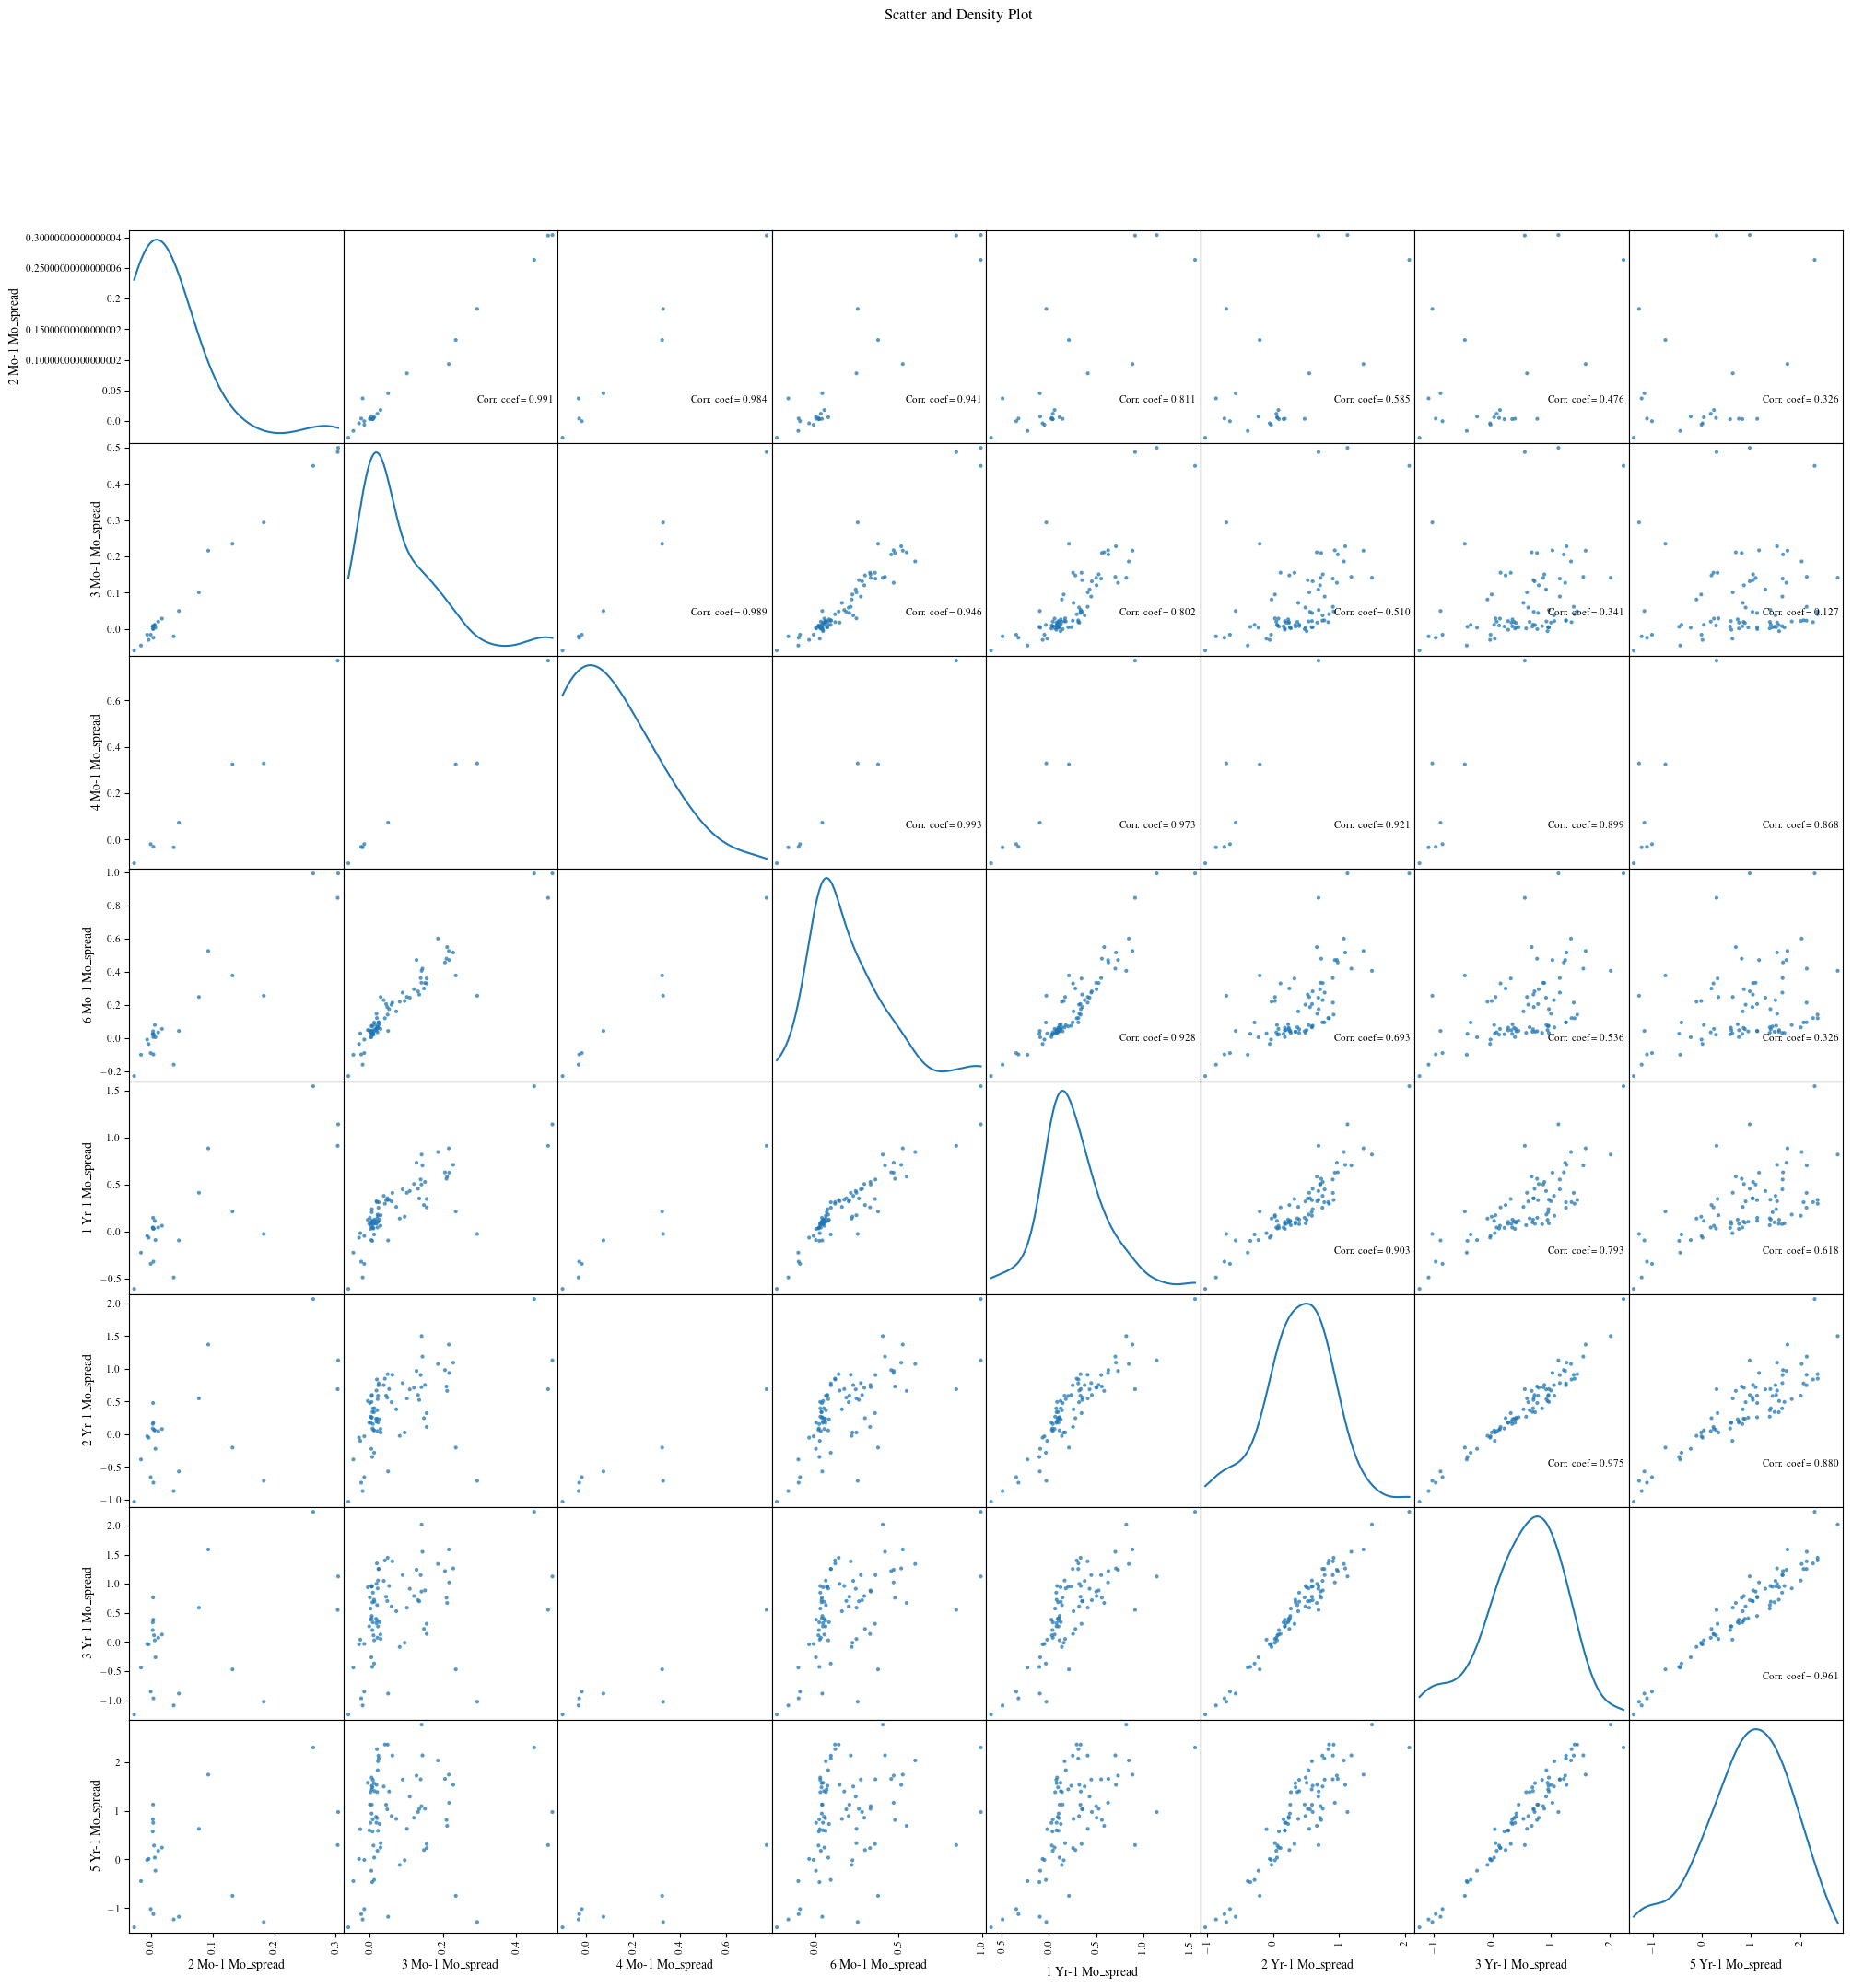

In [103]:
plotScatterMatrix(df_selected, 24, 8)

In [123]:
Spreads_df = result_df.copy()
Spreads_df.drop(columns=['Year', 'Quarter'], inplace=True)
Spreads_df.head()

,2 Mo-1 Mo_spread,3 Mo-1 Mo_spread,4 Mo-1 Mo_spread,6 Mo-1 Mo_spread,1 Yr-1 Mo_spread,2 Yr-1 Mo_spread,3 Yr-1 Mo_spread,5 Yr-1 Mo_spread,7 Yr-1 Mo_spread,10 Yr-1 Mo_spread,...,7 Yr-5 Yr_spread,10 Yr-5 Yr_spread,20 Yr-5 Yr_spread,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread
0,NaN,0.024032,NaN,0.093871,0.311774,0.776935,1.253387,2.071290,2.591774,3.100323,...,0.520484,1.029032,1.896935,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN
1,NaN,0.141613,NaN,0.405161,0.820968,1.500161,2.017419,2.766452,3.229355,3.642581,...,0.462903,0.876129,1.634677,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN
2,NaN,0.143906,NaN,0.418437,0.705000,1.186562,1.549531,2.135625,2.552188,2.931406,...,0.416562,0.795781,1.562656,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN
3,NaN,0.205645,NaN,0.455806,0.630968,0.980645,1.217097,1.651935,2.013226,2.334032,...,0.361290,0.682097,1.381129,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN
4,NaN,0.228197,NaN,0.515902,0.711475,1.093934,1.262951,1.529836,1.737869,1.942623,...,0.208033,0.412787,0.873279,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN


## GDP and Unemployment Dataset:

In [109]:
gdp_df = pd.read_csv(r"~/Desktop/Capstone Project/GDP.csv", parse_dates=True) ## GDP
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
print(gdp_df.shape)
gdp_df.head()

(309, 2)


,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [111]:
uner_df = pd.read_csv(r"~/Desktop/Capstone Project/UNRATE.csv") ## Unemployment Rate
uner_df['DATE'] = pd.to_datetime(uner_df['DATE'])
print(uner_df.shape)
uner_df.head()

(82, 2)


,DATE,UNRATE
0,2004-01-01,5.700000
1,2004-04-01,5.600000
2,2004-07-01,5.433333
3,2004-10-01,5.433333
4,2005-01-01,5.300000


In [113]:
df_gdp_uner = pd.merge(gdp_df,uner_df,on='DATE')
print(df_gdp_uner.shape)
df_gdp_uner.head()

(81, 3)


,DATE,GDP,UNRATE
0,2004-01-01,11923.447,5.700000
1,2004-04-01,12112.815,5.600000
2,2004-07-01,12305.307,5.433333
3,2004-10-01,12527.214,5.433333
4,2005-01-01,12767.286,5.300000


In [115]:
df_gdp_uner.rename(columns={'DATE': 'date'}, inplace=True)   

### Updating dates based on quarterly end dates and adjusting dates for December months: 

In [117]:
def update_quart_enddate_shift(df):
    # Define a dictionary to map the month to the new date
    quarter_end_dates = {1: (12, 31), 4: (3, 31), 7: (6, 30), 10: (9, 30)}

    # Apply the mapping to update the dates
    for month, (new_month, new_day) in quarter_end_dates.items():
        df.loc[df['date'].dt.month == month, 'date'] = df['date'].apply(
            lambda x: x.replace(month=new_month, day=new_day) if x.month == month else x
        )

    # offset the years by 1 for those whose month is december
    tmp_ids = df[df["date"].dt.month == 12].index
    df.loc[tmp_ids, "date"] = df.loc[tmp_ids, "date"] - pd.DateOffset(years=1)

    # drop the first row df_gdp_uner
    df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [119]:
df_gdp_uner =  update_quart_enddate_shift(df_gdp_uner)
df_gdp_uner.head()

,date,GDP,UNRATE
0,2004-03-31,12112.815,5.600000
1,2004-06-30,12305.307,5.433333
2,2004-09-30,12527.214,5.433333
3,2004-12-31,12767.286,5.300000
4,2005-03-31,12922.656,5.100000


In [121]:
# add a year column to df_gdp_uner
df_gdp_uner_copy = df_gdp_uner.copy()
df_gdp_uner_copy['Year'] = df_gdp_uner_copy['date'].dt.year
df_gdp_uner_copy.head()

,date,GDP,UNRATE,Year
0,2004-03-31,12112.815,5.600000,2004
1,2004-06-30,12305.307,5.433333,2004
2,2004-09-30,12527.214,5.433333,2004
3,2004-12-31,12767.286,5.300000,2004
4,2005-03-31,12922.656,5.100000,2005


In [125]:
df_gdp_uner_copy['Quarter'] = df_gdp_uner_copy['date'].apply(assign_quarter)
df_gdp_uner_copy.head()

,date,GDP,UNRATE,Year,Quarter
0,2004-03-31,12112.815,5.600000,2004,Q1
1,2004-06-30,12305.307,5.433333,2004,Q2
2,2004-09-30,12527.214,5.433333,2004,Q3
3,2004-12-31,12767.286,5.300000,2004,Q4
4,2005-03-31,12922.656,5.100000,2005,Q1


### Determine periods where GDP is decreasing:

In [127]:
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
gdp_df['Decrease'] = gdp_df['GDP'].diff().shift(-1) < 0
gdp_df.head()

,DATE,GDP,Decrease
0,1947-01-01,243.164,False
1,1947-04-01,245.968,False
2,1947-07-01,249.585,False
3,1947-10-01,259.745,False
4,1948-01-01,265.742,False


### Plot of GDP data over time:

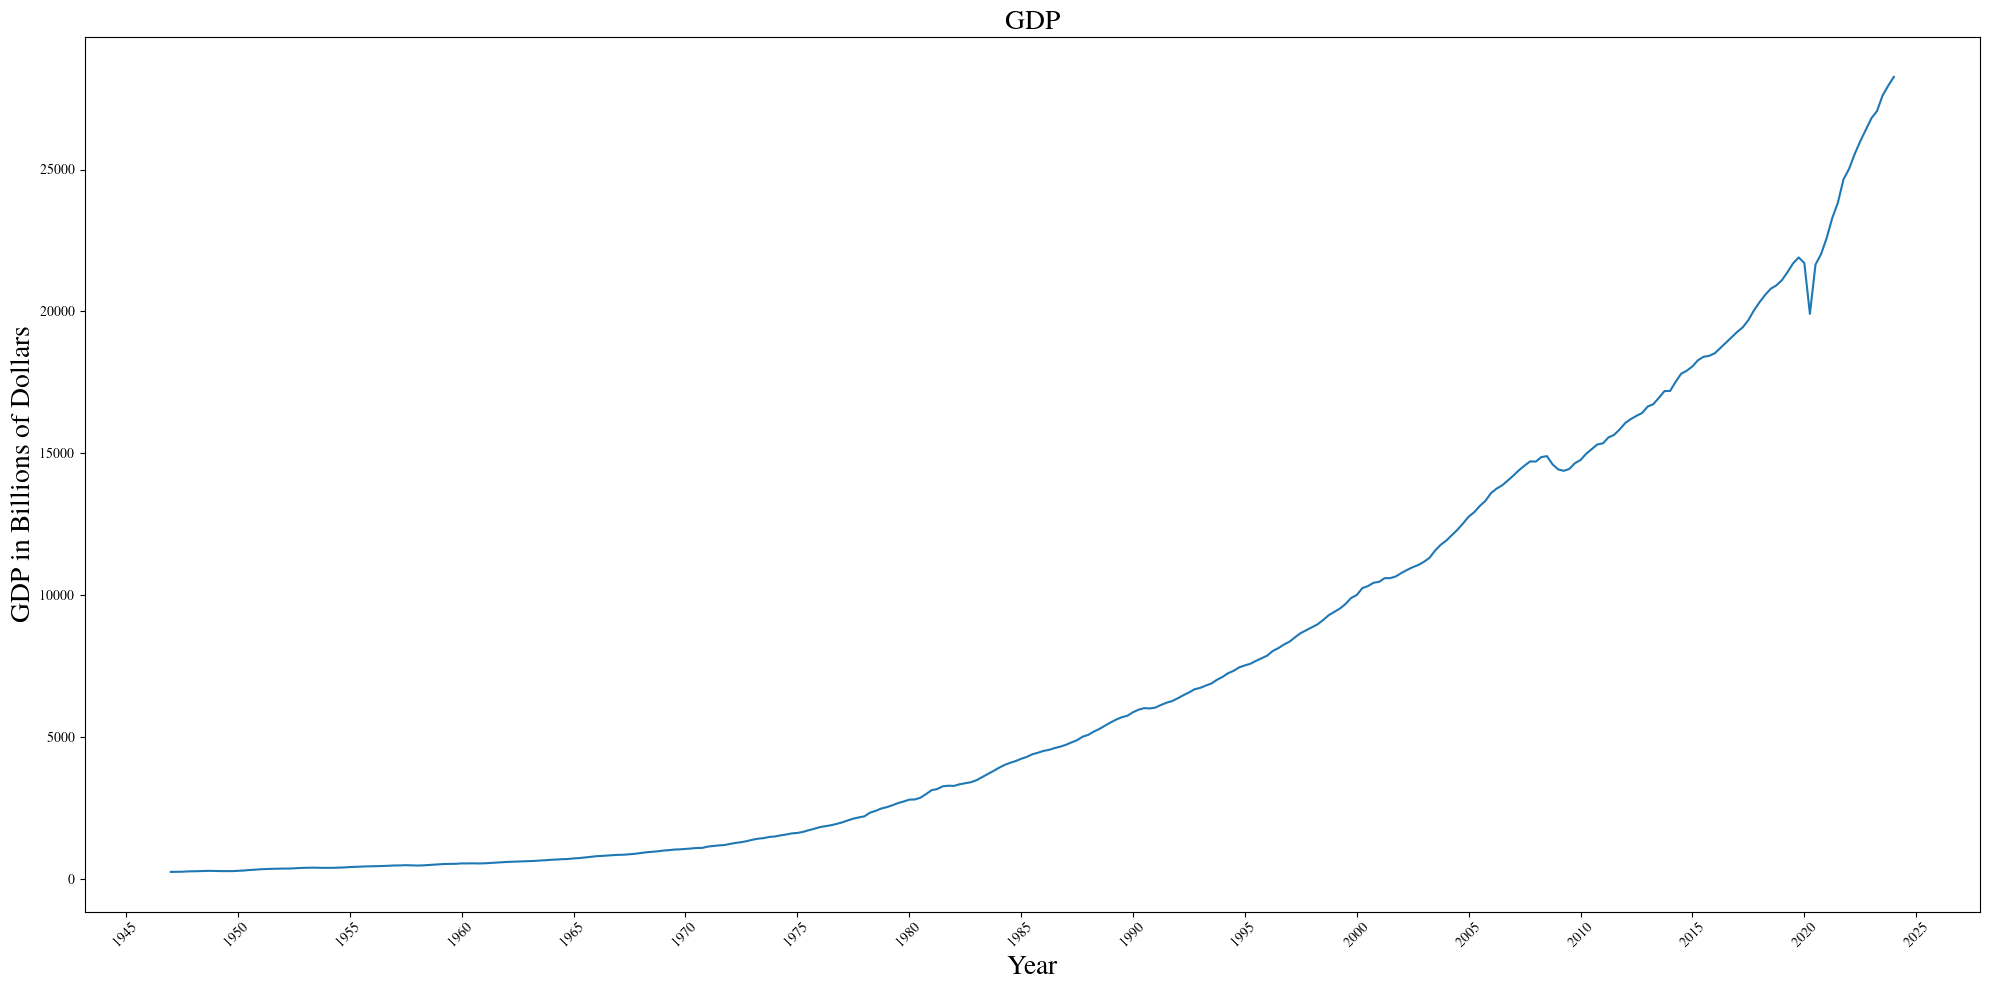

In [129]:
# Create a large figure
fic = plt.subplots(figsize=(20, 10))

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

# Plot the data
plt.plot(gdp_df['DATE'], gdp_df['GDP'])

# Label the axes and the title
plt.xlabel('Year', fontsize=20)
plt.ylabel('GDP in Billions of Dollars', fontsize=20)
plt.title('GDP', fontsize=20)

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### GDP from the year 2000 onwards:

In [131]:
gdp_after2000 = gdp_df[gdp_df['DATE'] >= '2000-01-01']
gdp_after2000.head()

,DATE,GDP,Decrease
212,2000-01-01,10002.179,False
213,2000-04-01,10247.720,False
214,2000-07-01,10318.165,False
215,2000-10-01,10435.744,False
216,2001-01-01,10470.231,False


### Visualizing GDP data after the year 2000, highlighting periods where GDP decreases:

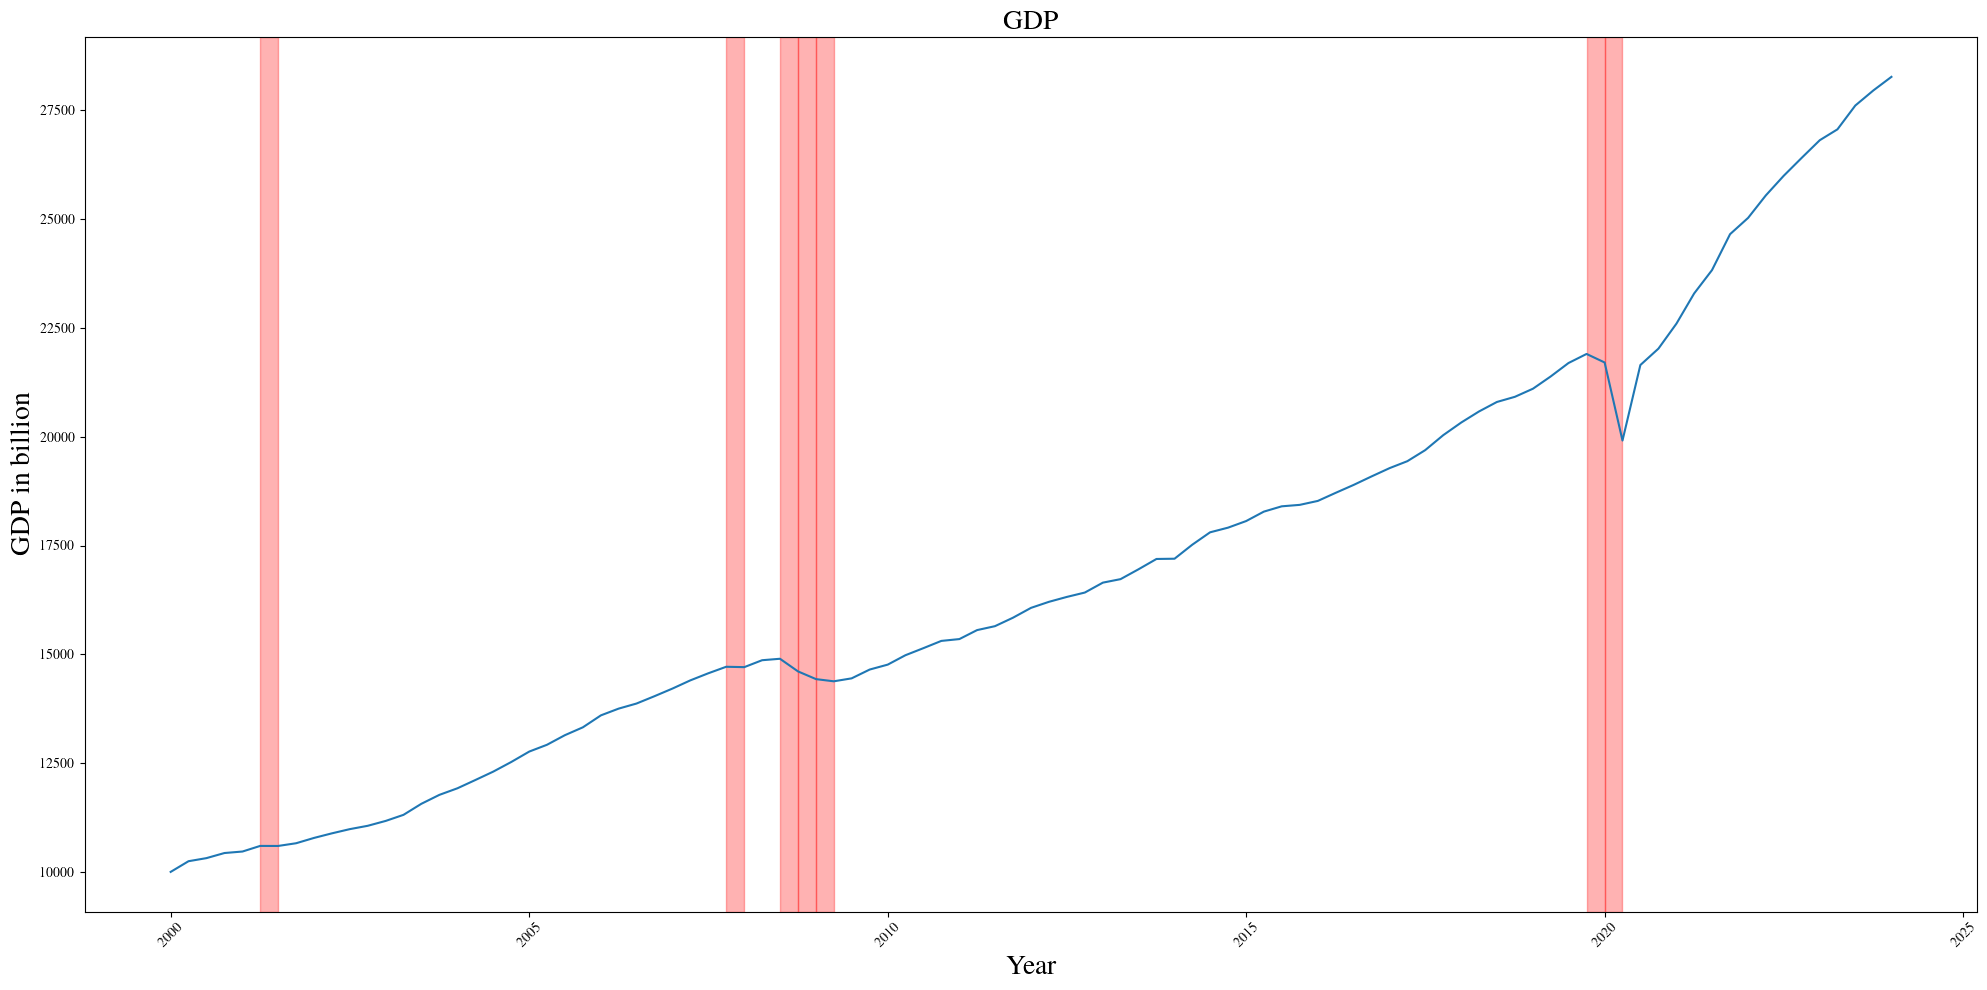

In [133]:
# Need a large figure
fic = plt.subplots(figsize = (20,10))

# Format the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

plt.plot(gdp_after2000['DATE'], gdp_after2000['GDP'])

# Highlight decreasing periods
for i in range(len(gdp_after2000) - 1):
    if gdp_after2000['Decrease'].iloc[i]:
        plt.axvspan(gdp_after2000['DATE'].iloc[i], gdp_after2000['DATE'].iloc[i + 1], color='red', alpha=0.3)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('GDP in billion', fontsize = 20)
plt.title('GDP', fontsize = 20)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Possible Reasons for GDP decrease:**

-  911 event
- 2008 crisis
- COVID pandemic

## Combine Interest Rates, GDP and Unemployment Rates:

In [135]:
cmev = pd.concat([finalrates_df, Spreads_df, df_gdp_uner], axis = 1)
cmev.drop(columns=['Year', 'Quarter'], inplace=True)
cmev.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,...,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread,date,GDP,UNRATE
0,0.909677,NaN,0.933710,NaN,1.003548,1.221452,1.686613,2.163065,2.980968,3.501452,...,NaN,0.508548,1.376452,NaN,0.867903,NaN,NaN,2004-03-31,12112.815,5.600000
1,0.954516,NaN,1.096129,NaN,1.359677,1.775484,2.454677,2.971935,3.720968,4.183871,...,NaN,0.413226,1.171774,NaN,0.758548,NaN,NaN,2004-06-30,12305.307,5.433333
2,1.370000,NaN,1.513906,NaN,1.788437,2.075000,2.556563,2.919531,3.505625,3.922188,...,NaN,0.379219,1.146094,NaN,0.766875,NaN,NaN,2004-09-30,12527.214,5.433333
3,1.841774,NaN,2.047419,NaN,2.297581,2.472742,2.822419,3.058871,3.493710,3.855000,...,NaN,0.320806,1.019839,NaN,0.699032,NaN,NaN,2004-12-31,12767.286,5.300000
4,2.360984,NaN,2.589180,NaN,2.876885,3.072459,3.454918,3.623934,3.890820,4.098852,...,NaN,0.204754,0.665246,NaN,0.460492,NaN,NaN,2005-03-31,12922.656,5.100000


In [137]:
cmev.shape

(83, 94)

In [139]:
Quarterized_dfs.head()

,RSSD ID,Start Date,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Total Assets,Interest Income Year-to-Date,Interest Expense,Non-Interest Income Year-to-Date,Non-Interest Expense,Quarter,Year,Interest Income per Quarter,Normalized Interest Income per Quarter
0,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,11959875.0,108983.0,15686.0,30819.0,79566.0,1,2018,108983.0,0.009112
1,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-06-30 00:00:00+00:00,12077601.0,224623.0,36271.0,60958.0,159789.0,2,2018,115640.0,0.009575
2,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-09-30 00:00:00+00:00,12119987.0,342266.0,58552.0,91838.0,239242.0,3,2018,117643.0,0.009707
3,1020180,2015-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,1.0,2018-12-31 00:00:00+00:00,12192038.0,462684.0,83107.0,124334.0,325762.0,4,2018,120418.0,0.009877
4,1020180,2005-12-31 00:00:00+00:00,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,6480680.0,100170.0,43216.0,18200.0,47328.0,1,2006,100170.0,0.015457


In [141]:
Quarterized_dfs.shape

(243757, 15)

In [143]:
# selecting some columns of Quater
small_Quaterized_dfs = Quarterized_dfs[['RSSD ID', 'Firm Legal Name', 'FR District Code', 'Bank Count', 'Reporting Date', 'Year', 'Quarter',
                                        'Normalized Interest Income per Quarter']]
small_Quaterized_dfs.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter
0,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31 00:00:00+00:00,2018,1,0.009112
1,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-06-30 00:00:00+00:00,2018,2,0.009575
2,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-09-30 00:00:00+00:00,2018,3,0.009707
3,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-12-31 00:00:00+00:00,2018,4,0.009877
4,1020180,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31 00:00:00+00:00,2006,1,0.015457


In [149]:
# Localize datetime columns to None
small_Quaterized_dfs.loc[:, 'Reporting Date'] = small_Quaterized_dfs['Reporting Date'].dt.tz_localize(None)
cmev.loc[:, 'date'] = cmev['date'].dt.tz_localize(None)

# # Merge the DataFrames
# df = small_Quaterized_dfs.merge(cmev, left_on='Reporting Date', right_on='date', how='left')
# df.drop(columns=['date'], inplace=True)

df = small_Quaterized_dfs.merge(cmev, left_on='Reporting Date', right_on='date', how='left')
df.drop(columns=['date'], inplace=True)
df.head()

,RSSD ID,Firm Legal Name,FR District Code,Bank Count,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,1 Mo,2 Mo,...,20 Yr-5 Yr_spread,30 Yr-5 Yr_spread,10 Yr-7 Yr_spread,20 Yr-7 Yr_spread,30 Yr-7 Yr_spread,20 Yr-10 Yr_spread,30 Yr-10 Yr_spread,30 Yr-20 Yr_spread,GDP,UNRATE
0,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-03-31,2018,1,0.009112,1.440984,NaN,...,0.369672,0.495246,0.074590,0.220656,0.346230,0.146066,0.271639,0.125574,20580.912,3.933333
1,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-06-30,2018,2,0.009575,1.723906,NaN,...,0.231562,0.319688,0.046562,0.123125,0.211250,0.076563,0.164688,0.088125,20798.730,3.766667
2,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-09-30,2018,3,0.009707,1.953968,NaN,...,0.187302,0.253968,0.041587,0.114127,0.180794,0.072540,0.139206,0.066667,20917.867,3.833333
3,1020180,BREMER FINANCIAL CORPORATION,9,1.0,2018-12-31,2018,4,0.009877,2.255410,2.333333,...,0.292951,0.387049,0.074590,0.210000,0.304098,0.135410,0.229508,0.094098,21104.133,3.866667
4,1020180,BREMER FINANCIAL CORPORATION,9,9.0,2006-03-31,2006,1,0.015457,4.358710,NaN,...,0.221613,0.110636,0.021613,0.218548,0.107572,0.196935,0.085959,-0.110977,13753.424,4.633333


In [151]:
df.shape

(243757, 101)

## Modeling:

### Drop and Fill NA values:

In [153]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

RSSD ID                                        0
Firm Legal Name                                0
FR District Code                               0
Bank Count                                  9119
Reporting Date                                 0
Year                                           0
Quarter                                        0
Normalized Interest Income per Quarter    170096
1 Mo                                         473
2 Mo                                      194565
3 Mo                                         473
4 Mo                                      231244
6 Mo                                         473
1 Yr                                         473
2 Yr                                         473
3 Yr                                         473
5 Yr                                         473
7 Yr                                         473
10 Yr                                        473
20 Yr                                        473
30 Yr               

In [155]:
# Extract the 'Normalized Interest Income per Quarter' column
normalized_income = df['Normalized Interest Income per Quarter']

# Fill missing values with the mean of the column
normalized_income_filled = normalized_income.fillna(normalized_income.mean())

# Update the original DataFrame
df['Normalized Interest Income per Quarter'] = normalized_income_filled

In [165]:
# Display the number of missing values per column
missing_values = df.isnull().sum()

# Sort the columns by the number of missing values (ascending order)
sorted_missing_values = missing_values.sort_values()

# Filter the DataFrame to include only columns with fewer missing values (e.g., less than a threshold)
# Set a threshold for maximum allowed missing values (e.g., 500)
threshold = 500
filtered_columns = sorted_missing_values[sorted_missing_values <= threshold].index

# Create a new DataFrame with the filtered columns
df = df[filtered_columns].dropna()
df.head()

,RSSD ID,FR District Code,Reporting Date,Year,Quarter,Normalized Interest Income per Quarter,3 Yr-1 Yr_spread,2 Yr-1 Yr_spread,20 Yr-6 Mo_spread,10 Yr-6 Mo_spread,...,3 Yr,2 Yr,1 Yr,6 Mo,3 Mo,1 Mo,7 Yr,1 Yr-1 Mo_spread,20 Yr-1 Mo_spread,UNRATE
0,1020180,9,2018-03-31,2018,1,0.009112,0.364262,0.218033,1.130656,0.984590,...,2.306721,2.160492,1.942459,1.773934,1.582131,1.440984,2.683934,0.501475,1.463607,3.933333
1,1020180,9,2018-06-30,2018,2,0.009575,0.356875,0.224844,0.941875,0.865312,...,2.609062,2.477031,2.252187,2.055312,1.874688,1.723906,2.874062,0.528281,1.273281,3.766667
2,1020180,9,2018-09-30,2018,3,0.009707,0.283333,0.205714,0.748095,0.675556,...,2.743492,2.665873,2.460159,2.248254,2.074603,1.953968,2.882222,0.506190,1.042381,3.833333
3,1020180,9,2018-12-31,2018,4,0.009877,0.176066,0.134590,0.673770,0.538361,...,2.844262,2.802787,2.668197,2.502787,2.356721,2.255410,2.966557,0.412787,0.921148,3.866667
4,1020180,9,2006-03-31,2006,1,0.015457,-0.057742,-0.035645,0.116774,-0.080161,...,4.582581,4.604677,4.640323,4.657258,4.506613,4.358710,4.555484,0.281613,0.415323,4.633333


In [159]:
df.shape

(243284, 64)

In [161]:
df.isna().sum()

RSSD ID                                   0
Firm Legal Name                           0
FR District Code                          0
Reporting Date                            0
Year                                      0
Quarter                                   0
Normalized Interest Income per Quarter    0
3 Yr-1 Yr_spread                          0
2 Yr-1 Yr_spread                          0
20 Yr-6 Mo_spread                         0
10 Yr-6 Mo_spread                         0
7 Yr-6 Mo_spread                          0
5 Yr-6 Mo_spread                          0
3 Yr-6 Mo_spread                          0
10 Yr-3 Mo_spread                         0
1 Yr-6 Mo_spread                          0
20 Yr-3 Mo_spread                         0
5 Yr-1 Yr_spread                          0
GDP                                       0
5 Yr-3 Mo_spread                          0
3 Yr-3 Mo_spread                          0
2 Yr-3 Mo_spread                          0
2 Yr-6 Mo_spread                

### Model:

In [ ]:
### Target and Predictor Variables

In [ ]:
columns_to_consider = df.columns[9:] # columns of rates, GDP, and unerate

columns_to_include = [col for col in columns_to_consider]

df[columns_to_include]

X= df[columns_to_include]  #Dependent variables

y= df['Normalized Net Interest Income per Quarter'] #Independent variable PPNR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')